# missing Values

In [6]:
# missing values (na values)
import pandas as pd
claim=pd.read_csv("claimants.csv")

In [7]:
print(claim)

      CASENUM  ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE    LOSS
0           5         0     0.0       1.0       0.0    50.0  34.940
1           3         1     1.0       0.0       0.0    18.0   0.891
2          66         1     0.0       1.0       0.0     5.0   0.330
3          70         0     0.0       1.0       1.0    31.0   0.037
4          96         1     0.0       1.0       0.0    30.0   0.038
...       ...       ...     ...       ...       ...     ...     ...
1335    34100         1     0.0       1.0       0.0     NaN   0.576
1336    34110         0     1.0       1.0       0.0    46.0   3.705
1337    34113         1     1.0       1.0       0.0    39.0   0.099
1338    34145         0     1.0       0.0       0.0     8.0   3.177
1339    34153         1     1.0       1.0       0.0    30.0   0.688

[1340 rows x 7 columns]


In [16]:
print(claim.isna().sum())

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64


In [3]:
claim.dropna(inplace=True)

In [12]:
# mean imputation
from sklearn.impute import SimpleImputer
import numpy as np

In [13]:
mean_data=pd.DataFrame(claim)

In [14]:
mean_imputer=SimpleImputer(missing_values=np.nan,strategy='mean')

mean_data['CLMAGE']=pd.DataFrame(mean_imputer.fit_transform(claim[['CLMAGE']]))


mean_data['CLMSEX']=pd.DataFrame(mean_imputer.fit_transform(claim[['CLMSEX']]))

mean_data['CLMINSUR']=pd.DataFrame(mean_imputer.fit_transform(claim[['CLMINSUR']]))


mean_data['SEATBELT']=pd.DataFrame(mean_imputer.fit_transform(claim[['SEATBELT']]))

mean_data.isna().sum()

CASENUM     0
ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [15]:
print(mean_data)

      CASENUM  ATTORNEY  CLMSEX  CLMINSUR  SEATBELT     CLMAGE    LOSS
0           5         0     0.0       1.0       0.0  50.000000  34.940
1           3         1     1.0       0.0       0.0  18.000000   0.891
2          66         1     0.0       1.0       0.0   5.000000   0.330
3          70         0     0.0       1.0       1.0  31.000000   0.037
4          96         1     0.0       1.0       0.0  30.000000   0.038
...       ...       ...     ...       ...       ...        ...     ...
1335    34100         1     0.0       1.0       0.0  28.414422   0.576
1336    34110         0     1.0       1.0       0.0  46.000000   3.705
1337    34113         1     1.0       1.0       0.0  39.000000   0.099
1338    34145         0     1.0       0.0       0.0   8.000000   3.177
1339    34153         1     1.0       1.0       0.0  30.000000   0.688

[1340 rows x 7 columns]


In [17]:
median_data=pd.DataFrame(claim)

In [19]:
# median imputation
#median Simple Imputete for median
median_imputer=SimpleImputer(missing_values=np.nan,strategy='median')

median_data['CLMAGE']=pd.DataFrame(median_imputer.fit_transform(claim[['CLMAGE']]))


median_data['CLMSEX']=pd.DataFrame(median_imputer.fit_transform(claim[['CLMSEX']]))

median_data['CLMINSUR']=pd.DataFrame(median_imputer.fit_transform(claim[['CLMINSUR']]))


median_data['SEATBELT']=pd.DataFrame(median_imputer.fit_transform(claim[['SEATBELT']]))

median_data.isna().sum()

CASENUM     0
ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [20]:
print(median_data)

      CASENUM  ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE    LOSS
0           5         0     0.0       1.0       0.0    50.0  34.940
1           3         1     1.0       0.0       0.0    18.0   0.891
2          66         1     0.0       1.0       0.0     5.0   0.330
3          70         0     0.0       1.0       1.0    31.0   0.037
4          96         1     0.0       1.0       0.0    30.0   0.038
...       ...       ...     ...       ...       ...     ...     ...
1335    34100         1     0.0       1.0       0.0    30.0   0.576
1336    34110         0     1.0       1.0       0.0    46.0   3.705
1337    34113         1     1.0       1.0       0.0    39.0   0.099
1338    34145         0     1.0       0.0       0.0     8.0   3.177
1339    34153         1     1.0       1.0       0.0    30.0   0.688

[1340 rows x 7 columns]


zero variance

# zero variance

In [21]:
zerovar_data=pd.read_csv("Z_dataset.csv")

In [22]:
zerovar_data.dtypes


Id                  int64
square.length     float64
square.breadth    float64
rec.Length        float64
rec.breadth       float64
colour             object
dtype: object

In [23]:
print(zerovar_data['square.length'].var())
print(zerovar_data['square.breadth'].var())
print(zerovar_data['rec.Length'].var())
print(zerovar_data['rec.breadth'].var())

0.6856935123042505
0.1899794183445188
3.1162778523489942
0.5810062639821029


In [24]:
zerovar_data.drop(['Id','colour'],axis=1,inplace=True)

In [ ]:
'''
The sklearn.feature_selection.VarianceThreshold 
is a feature selector that removes all features 
in a dataset whose variance is lower than a 
specified threshold. 
It operates in an unsupervised manner, 
considering only the features (X) and 
ignoring the target variable (y). 
'''

In [25]:
from sklearn.feature_selection import VarianceThreshold
selector=VarianceThreshold(0.9)

In [30]:
new_data=selector.fit_transform(zerovar_data)

In [31]:
new_data=pd.DataFrame(new_data)

In [28]:
new_data=new_data.rename(columns={0:'rec.Length'})

In [32]:
new_data.var()

0    3.116278
dtype: float64

In [33]:
zerovar_data

,square.length,square.breadth,rec.Length,rec.breadth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# binning or discretization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

iris_data=pd.read_csv("iris.csv")



In [2]:
iris_data.columns
iris_data['Sepal.Length']


0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: Sepal.Length, Length: 150, dtype: float64

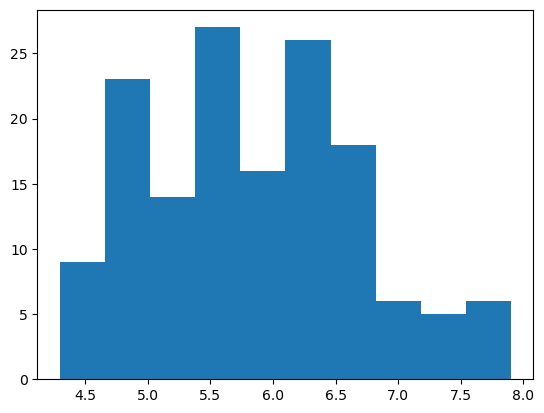

In [17]:
#binning sepal length using hist
sepalLength=plt.hist(iris_data['Sepal.Length'])


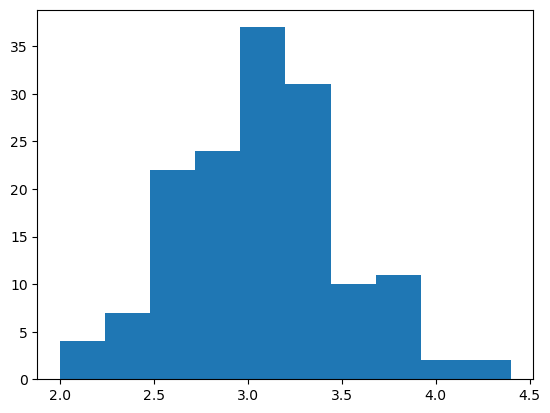

In [18]:
#binning sepal width using hist
sepalWidth=plt.hist(iris_data['Sepal.Width'])


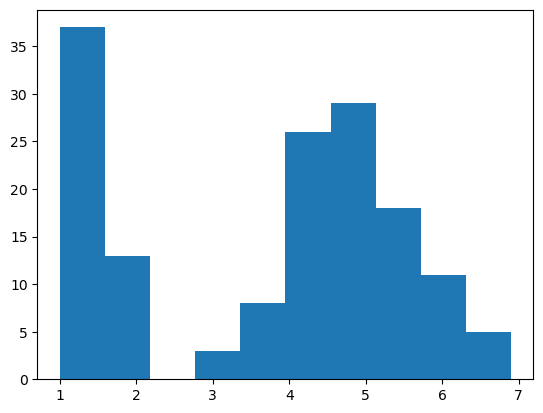

In [19]:
#binning petal length using hist
petalLength=plt.hist(iris_data['Petal.Length'])



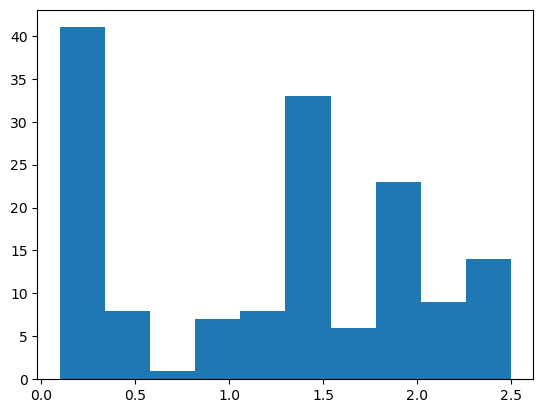

In [20]:
#binning petal width using hist
petalWidth=plt.hist(iris_data['Petal.Width'])

[ 9. 23. 14. 27. 16. 26. 18.  6.  5.  6.] [4.3  4.66 5.02 5.38 5.74 6.1  6.46 6.82 7.18 7.54 7.9 ]
[ 4.  7. 22. 24. 37. 31. 10. 11.  2.  2.] [2.   2.24 2.48 2.72 2.96 3.2  3.44 3.68 3.92 4.16 4.4 ]
[37. 13.  0.  3.  8. 26. 29. 18. 11.  5.] [1.   1.59 2.18 2.77 3.36 3.95 4.54 5.13 5.72 6.31 6.9 ]
[41.  8.  1.  7.  8. 33.  6. 23.  9. 14.] [0.1  0.34 0.58 0.82 1.06 1.3  1.54 1.78 2.02 2.26 2.5 ]


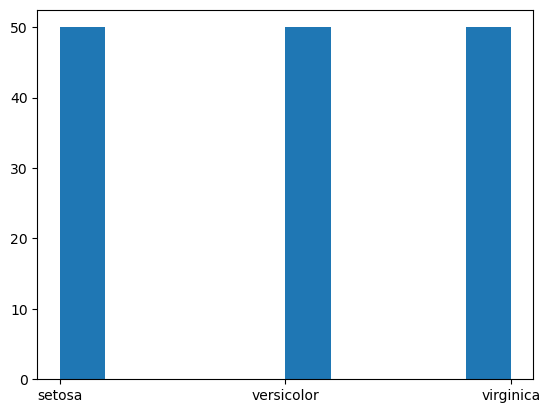

In [4]:
#binning species using hist
plt.hist(iris_data['Species'])

#the discretized value or grouped values of sepal length
print(sepalLength[0],sepalLength[1])
#the discretized value or grouped values of sepal width
print(sepalWidth[0],sepalWidth[1])
#the discretized value or grouped values of petal length
print(petalLength[0],petalLength[1])
#the discretized value or grouped values of petal width
print(petalWidth[0],petalWidth[1])

#print(species[0],species[1])   

# Dummy variable creation

In [9]:
# dummy variables,label encoding,one hot encoding

import pandas as pd
import numpy as np

#reading csv file using pandas
data=pd.read_csv("animal_category.csv")

data.columns
data.dtypes


Index       int64
Animals    object
Gender     object
Homly      object
Types      object
dtype: object

In [10]:
data

,Index,Animals,Gender,Homly,Types
0,1,Cat,Male,Yes,A
1,2,Dog,Male,Yes,B
2,3,Mouse,Male,Yes,C
3,4,Mouse,Male,Yes,C
4,5,Dog,Female,Yes,A
5,6,Cat,Female,Yes,B
6,7,Lion,Female,Yes,D
7,8,Goat,Female,Yes,E
8,9,Cat,Female,Yes,A
9,10,Dog,Male,Yes,B


In [7]:
############################################### using dummies for dummy data############################################

#Dropping nominal data and not required columns
data.drop(['Index','Animals','Homly'],axis=1,inplace=True)

data.dtypes


#creating dummies using pandas get_dummies
data_new=pd.get_dummies(data)

In [8]:
data_new

,Gender_Female,Gender_Male,Types_A,Types_B,Types_C,Types_D,Types_E
0,False,True,True,False,False,False,False
1,False,True,False,True,False,False,False
2,False,True,False,False,True,False,False
3,False,True,False,False,True,False,False
4,True,False,True,False,False,False,False
5,True,False,False,True,False,False,False
6,True,False,False,False,False,True,False
7,True,False,False,False,False,False,True
8,True,False,True,False,False,False,False
9,False,True,False,True,False,False,False


In [14]:
###################################################### one hot encoding##############################################
#importing onhotencoder from sklearn.preprocessing
from sklearn.preprocessing import OneHotEncoder

#reading csv file using pandas
data2=pd.read_csv("animal_category.csv")

#Dropping nominal data and not required columns
#data2.drop(['Index','Animals','Homly'],axis=1,inplace=True)
data_gender=data2.drop(['Index','Animals','Homly','Types'],axis=1)
data_type=data2.drop(['Index','Animals','Homly','Gender'],axis=1)

#onehot encoding assigned to encoder
encoder=OneHotEncoder(handle_unknown="ignore")

#onehot encoding the dataframe
#enoceded_df=pd.DataFrame(encoder.fit_transform(data2).toarray())
enoceded_df1=pd.DataFrame(encoder.fit_transform(data_gender).toarray())
enoceded_df2=pd.DataFrame(encoder.fit_transform(data_type).toarray())


enoceded_df


,0,1,2,3,4,5,6
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8,1.0,0.0,1.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [15]:
enoceded_df1


,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,0.0,1.0


In [16]:
enoceded_df2

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,1.0
8,1.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0


In [12]:
########################################################label encoder #############################################
#reading csv file using pandas
data3=pd.read_csv("animal_category.csv")

#Dropping nominal data and not required columns
data3.drop(['Index','Animals','Homly'],axis=1,inplace=True)

from sklearn.preprocessing import LabelEncoder #importing labelencoder from sklearn.preprocessing
labelencoder=LabelEncoder() #declaring and assigning variable labelencoder to LabelEncoder()

#getting columns from 0 i.e Gender only and assigning to x
x=data3.iloc[:,0]

#only Types column is assigned to y
y=data3['Types']


#label encoding x columns Gender
x=labelencoder.fit_transform(x)

#converting series to dataframe
x=pd.DataFrame(x)
#renaming the column name to gender 
x=x.rename(columns={0:'Gender'})

#label encoding y column Types
y=labelencoder.fit_transform(y)

#converting y from seris to dataframe
y=pd.DataFrame(y)

#renaming y column to Types
y=y.rename(columns={0:'Types'})

#joining the two x and y datframes by concat 
data3_new=pd.concat([x,y],axis=1)
data3_new.columns

Index(['Gender', 'Types'], dtype='object')

In [13]:
data3_new

,Gender,Types
0,1,0
1,1,1
2,1,2
3,1,2
4,0,0
5,0,1
6,0,3
7,0,4
8,0,0
9,1,1


# string manipulation

In [1]:
# string manipulation
a="Grow Gratitude" #String Grow Gratitude is assinged to variable 'a'

a_letter=a[0] #a_letter is variable which is assigned with a[0] which is first letter in string

print("The letter at zero position is",a_letter)# print the index of first character G in Grow it is starting of the word as python index starts from zero

a_length=len(a)#a_length is variable which is assigned to len function.len is python function which returns number of the items in an object 

print(a_length) #prints the length_a variable

a_count=a.count('G') #a_count is variable which is assigned to count. count is python function which counts the occurance of given character in a string

print(a_count) # prints the variable a_count

The letter at zero position is G
14
2


In [2]:
#2.
b="Being aware of a single shortcoming within yourself is far more useful than being aware of a thousand in someone else."
def count_chars(s): # keyword def is start of function and function name is count_chars and s is parameter to pass to function 
    result=0 # result is the variable which  is assigned to zero
    for ch in s: #for loop  where ch is the variable takes value inside the s argument and iterates until last character
        result+=1 #when ever loop iterates the result is incremented by 1 until last character in string for loop ends
    return result #returning the result value after the string ends and for loop breaks

print(count_chars(b)) #print the returned value from the count_chars

print(len(b))# the len function which is equal to count_chars and prints it



118
118


In [3]:
#3
c="Idealistic as it may sound, altruism should be the driving force in business, not just competition and a desire for wealth"
print(c[0])#get first character of the word
print(c[0:3])#get three characters of the word 0 specifies start index and 3 specify number of characters from first index
print(c[-3:])#get last three characters only -3 specifies begin from last incex to 3 characters

I
Ide
lth


In [5]:
#4
str_split="stay positive and optimistic"#declaring  custom variable and assigning string

str_split.split(" ")# split function splits the string with given suffix

print(str_split.startswith("H"))#startswith function retuns true if string starts with suffix given
print(str_split.endswith("d")) #endswith function returns true if string ends with suffix given
print(str_split.endswith("c"))#endswith function returns true if string ends with suffix given

False
False
True


In [6]:
#5
planet_string="🪐"

print(planet_string*108)# specify * after string and count it will print that much count times

 

🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐🪐


In [7]:
#function for printing count and string
def print_string(s,count):#custom function for string and count
    while count>0: #while loop until count greater than zero
        print(s) #printing string until while loop breaks
        count=count-1 #decrementing count by 1 in every iteration
        
print_string(planet_string,108) #passing string and count to function



🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐
🪐


In [8]:
#7
word="Grow Gratitude" #word variable is declared with string
word=word.replace("Grow","Growth of")# string.replace(old string to be replaced,new string to replace,occurance of string count to be replaced)
print(word)#printing the replaced words



Growth of Gratitude


In [10]:
#8
story=""".elgnuj eht ot ni ffo deps meht fo htoB .eerf noil eht tes ot sepor eht no dewang dna nar eh ,ylkciuQ .elbuort ni noil eht deciton dna tsap deklaw esuom eht ,nooS .repmihw ot detrats dna tuo teg ot gnilggurts saw noil ehT .eert a tsniaga pu mih deit yehT .meht htiw noil eht koot dna tserof eht ot ni emac sretnuh wef a ,yad enO .og mih tel dna ecnedifnoc s’esuom eht ta dehgual noil ehT ”.em evas uoy fi yademos uoy ot pleh taerg fo eb lliw I ,uoy esimorp I“ .eerf mih tes ot noil eht detseuqer yletarepsed esuom eht nehw esuom eht tae ot tuoba saw eH  .yrgna etiuq puekow eh dna ,peels s’noil eht debrutsid sihT .nuf rof tsuj ydob sih nwod dna pu gninnur detrats esuom a nehw elgnuj eht ni gnipeels ecno saw noil A"""

def reverse_str(s): #custom function for reversing  a string and passing string parameter
    st="" #declaring empty string to store reverse string
    for i in s: #for loop to iterates i variable inside value string s
        st=i+st #joins the every character in string to beginning and store in st variable
    return st #returns the string reversed format

reverse_story=reverse_str(story) #declaring varaible for string reversed string returned from function
print(reverse_story) #printing the reversed string


A lion was once sleeping in the jungle when a mouse started running up and down his body just for fun. This disturbed the lion’s sleep, and he wokeup quite angry.  He was about to eat the mouse when the mouse desperately requested the lion to set him free. “I promise you, I will be of great help to you someday if you save me.” The lion laughed at the mouse’s confidence and let him go. One day, a few hunters came in to the forest and took the lion with them. They tied him up against a tree. The lion was struggling to get out and started to whimper. Soon, the mouse walked past and noticed the lion in trouble. Quickly, he ran and gnawed on the ropes to set the lion free. Both of them sped off in to the jungle.


In [13]:
print(reversed(story))

In [11]:
print(''.join(reversed(story))) #add nothing after every character and  reverse the string 

A lion was once sleeping in the jungle when a mouse started running up and down his body just for fun. This disturbed the lion’s sleep, and he wokeup quite angry.  He was about to eat the mouse when the mouse desperately requested the lion to set him free. “I promise you, I will be of great help to you someday if you save me.” The lion laughed at the mouse’s confidence and let him go. One day, a few hunters came in to the forest and took the lion with them. They tied him up against a tree. The lion was struggling to get out and started to whimper. Soon, the mouse walked past and noticed the lion in trouble. Quickly, he ran and gnawed on the ropes to set the lion free. Both of them sped off in to the jungle.


In [1]:
'''Regular expressions (regex) in 
Python are used for complex 
pattern matching and text 
manipulation using the 
built-in re module. 
Patterns are typically 
defined using raw strings 
(prefixed with r) 
to avoid conflicts with 
Python's own escape character usage. '''

import re
print(re.search(r"train","The rain in Spain"))
print(re.search(r"train","The rain in Spain").group())

None


AttributeError: 'NoneType' object has no attribute 'group'

In [27]:
re.search(r"S...n","The rain in Spain")

<re.Match object; span=(12, 17), match='Spain'>

In [3]:
re.search(r"c.t","caat cot crt")

<re.Match object; span=(5, 8), match='cot'>

In [16]:
re.search(r"c.t","cat cot crt").group()

'cat'

In [29]:
re.search(r"c..t","cat cot crrt")

<re.Match object; span=(8, 12), match='crrt'>

In [5]:
re.match(r"^Then","The great nation of world")

In [19]:
re.match(r"world$","The great nation of world")

In [39]:
re.sub(r"^The","-","The rain in spain")

'- rain in spain'

In [41]:
re.findall(r"c.t","the cat is sleeping on cot ")

['cat', 'cot']

In [42]:
re.split(r"\s","The spain is raining")

['The', 'spain', 'is', 'raining']

In [47]:
re.sub(r"^a-zA-Z","-","The rain in spain")

'The rain in spain'

In [48]:
re.sub("[^a-zA-Z" "]+","-","The rain in spain")

'The-rain-in-spain'

In [43]:
paragraph="This is paragraph for @#$ 123456789 🪐"
paragraph=re.sub("[^a-zA-Z" "]+"," ",paragraph).lower()

In [44]:
paragraph

'this is paragraph for '

In [45]:
paragraph=re.sub("[0-9" "]+"," ",paragraph)

In [46]:
paragraph

'this is paragraph for '

# transformation  (type casting, log, sqrt, square,exponential) 

# Pandas deals with "encoding" in two primary contexts: specifying the character encoding when reading or writing files (like CSVs), and encoding categorical data into numerical formats for analysis or machine learning. 
File Encoding (Reading/Writing Data)
When importing or exporting data with functions like pandas.read_csv() or pandas.DataFrame.to_csv(), the encoding parameter is used to specify how characters are stored and interpreted. The default encoding is usually 'utf-8' in Python 3. 
read_csv(filename, encoding='...'): Use this parameter to prevent UnicodeDecodeError when the file's actual encoding (e.g., 'iso-8859-1', 'latin1', or 'utf-16') does not match the default.
to_csv(filename, encoding='...'): Use this parameter to save your data in a specific character format, which is useful when the file needs to be read by other software that expects a different encoding.

In [24]:
# type casting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#encoding latin1 to read this file as there are some special character in this file
type_data=pd.read_csv("OnlineRetail.csv",encoding='latin1')

In [6]:
type_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [2]:
type_data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [3]:
type_data.UnitPrice=type_data.UnitPrice.astype('int64')
type_data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice        int64
CustomerID     float64
Country         object
dtype: object

In [15]:
type_data.dropna(inplace=True)

In [4]:
#Q2. Check for the duplicate values, and handle the duplicate values
duplicate=type_data[type_data.duplicated('InvoiceNo')]#checking duplicates based on invoice
duplicate
data=duplicate.drop_duplicates(subset='InvoiceNo',keep='first')#keep first duplicate values of the subset invoice no

In [53]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1,17850.0,United Kingdom
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,12/1/2010 8:34,2,13047.0,United Kingdom
22,536368,22913,RED COAT RACK PARIS FASHION,3,12/1/2010 8:34,4,13047.0,United Kingdom
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3,12583.0,France
...,...,...,...,...,...,...,...,...
541866,581583,85038,6 CHOCOLATE LOVE HEART T-LIGHTS,36,12/9/2011 12:23,1,13777.0,United Kingdom
541868,581584,85038,6 CHOCOLATE LOVE HEART T-LIGHTS,48,12/9/2011 12:25,1,13777.0,United Kingdom
541870,581585,22915,ASSORTED BOTTLE TOP MAGNETS,24,12/9/2011 12:31,0,15804.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2011 12:49,1,13113.0,United Kingdom


In [9]:
def clean_text(data):
    data=re.sub("[^a-zA-Z" "]+"," ",data).lower()
    return data

In [17]:
type_data["Description"]=type_data["Description"].apply(clean_text)

In [19]:
type_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t light holder,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,pack of spaceboy napkins,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,children s apron dolly girl,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,childrens cutlery dolly girl,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,childrens cutlery circus parade,4,12/9/2011 12:50,4.15,12680.0,France


In [7]:
import scipy.stats as stats

In [8]:
import pylab

In [9]:
calories=pd.read_csv("calories_consumed.csv")

In [18]:
calories

,Weight gained (grams),Calories Consumed
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500
5,110,1600
6,128,1400
7,62,1900
8,600,2800
9,1100,3900


In [19]:
calories.describe()

,Weight gained (grams),Calories Consumed
count,14.000000,14.000000
mean,357.714286,2340.714286
std,333.692495,752.109488
min,62.000000,1400.000000
25%,114.500000,1727.500000
50%,200.000000,2250.000000
75%,537.500000,2775.000000
max,1100.000000,3900.000000


In [20]:
bins=["Low","Medium","High"]
calories["Calorie_bin"]=pd.cut(calories['Calories Consumed'], bins=3, labels=bins)

In [21]:
calories

,Weight gained (grams),Calories Consumed,Calorie_bin
0,108,1500,Low
1,200,2300,Medium
2,900,3400,High
3,200,2200,Low
4,300,2500,Medium
5,110,1600,Low
6,128,1400,Low
7,62,1900,Low
8,600,2800,Medium
9,1100,3900,High


In [10]:
weight_grains=calories['Weight gained (grams)']# getting column name weight grains (grams) 
calories_consumed=calories['Calories Consumed']# getting column name calories consumed 

((array([-1.66151682, -1.18948235, -0.88997893, -0.65463235, -0.45108016,
         -0.2648058 , -0.08735875,  0.08735875,  0.2648058 ,  0.45108016,
          0.65463235,  0.88997893,  1.18948235,  1.66151682]),
  array([  62,  100,  108,  110,  128,  150,  200,  200,  300,  350,  600,
          700,  900, 1100], dtype=int64)),
 (322.66332324031407, 357.7142857142857, 0.9036888266584125))

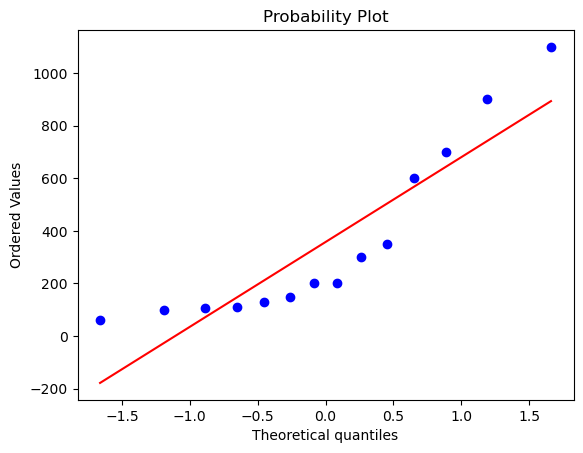

In [11]:
stats.probplot(weight_grains,dist="norm",plot=pylab)

((array([-1.66151682, -1.18948235, -0.88997893, -0.65463235, -0.45108016,
         -0.2648058 , -0.08735875,  0.08735875,  0.2648058 ,  0.45108016,
          0.65463235,  0.88997893,  1.18948235,  1.66151682]),
  array([4.12713439, 4.60517019, 4.68213123, 4.70048037, 4.85203026,
         5.01063529, 5.29831737, 5.29831737, 5.70378247, 5.85793315,
         6.39692966, 6.55108034, 6.80239476, 7.00306546])),
 (0.9514259344176449, 5.492100164040839, 0.977010889183083))

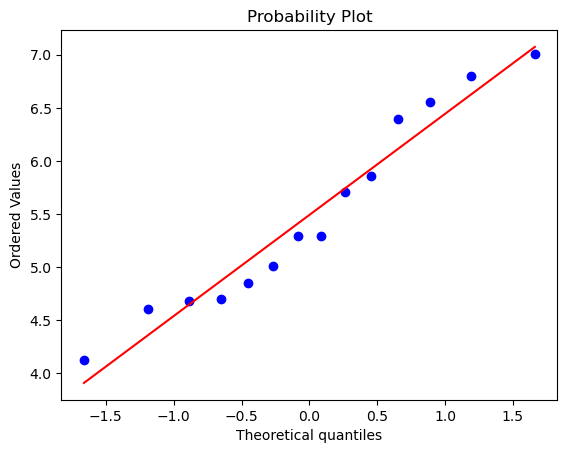

In [12]:
stats.probplot(np.log(weight_grains),dist="norm",plot=pylab)

((array([-1.66151682, -1.18948235, -0.88997893, -0.65463235, -0.45108016,
         -0.2648058 , -0.08735875,  0.08735875,  0.2648058 ,  0.45108016,
          0.65463235,  0.88997893,  1.18948235,  1.66151682]),
  array([ 7.87400787, 10.        , 10.39230485, 10.48808848, 11.3137085 ,
         12.24744871, 14.14213562, 14.14213562, 17.32050808, 18.70828693,
         24.49489743, 26.45751311, 30.        , 33.1662479 ])),
 (8.274920101303552, 17.19623450807709, 0.9464072269126588))

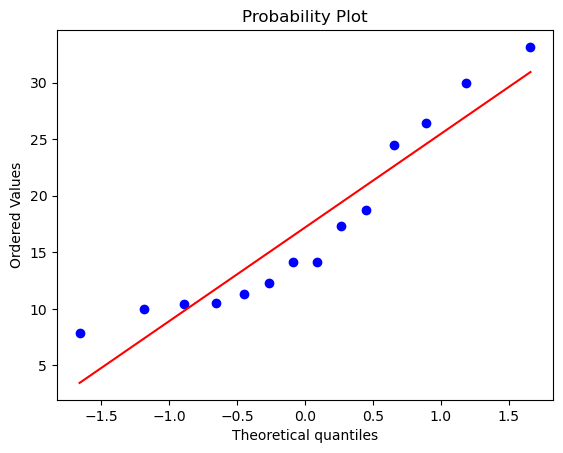

In [15]:
stats.probplot(np.sqrt(weight_grains),dist="norm",plot=pylab)

C:\Users\pc\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\pc\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


((array([-1.66151682, -1.18948235, -0.88997893, -0.65463235, -0.45108016,
         -0.2648058 , -0.08735875,  0.08735875,  0.2648058 ,  0.45108016,
          0.65463235,  0.88997893,  1.18948235,  1.66151682]),
  array([8.43835667e+026, 2.68811714e+043, 8.01316426e+046, 5.92097203e+047,
         3.88770841e+055, 1.39370958e+065, 7.22597377e+086, 7.22597377e+086,
         1.94242640e+130, 1.00709089e+152, 3.77302030e+260, 1.01423205e+304,
                     inf,             inf])),
 (nan, nan, nan))

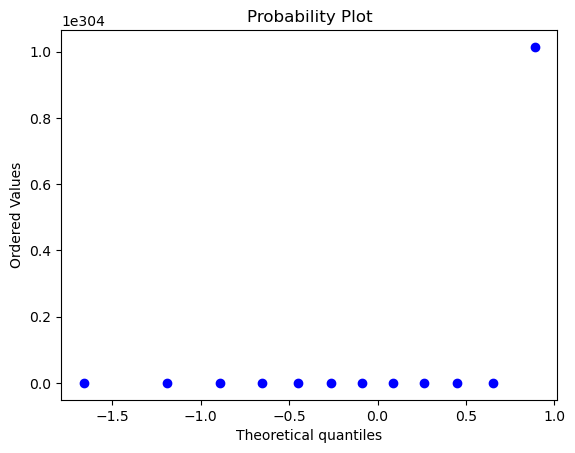

In [16]:
stats.probplot(np.exp(weight_grains),dist="norm",plot=pylab)

((array([-1.66151682, -1.18948235, -0.88997893, -0.65463235, -0.45108016,
         -0.2648058 , -0.08735875,  0.08735875,  0.2648058 ,  0.45108016,
          0.65463235,  0.88997893,  1.18948235,  1.66151682]),
  array([0.00090909, 0.00111111, 0.00142857, 0.00166667, 0.00285714,
         0.00333333, 0.005     , 0.005     , 0.00666667, 0.0078125 ,
         0.00909091, 0.00925926, 0.01      , 0.01612903])),
 (0.004474685000609506, 0.005733163112915417, 0.9536499028906325))

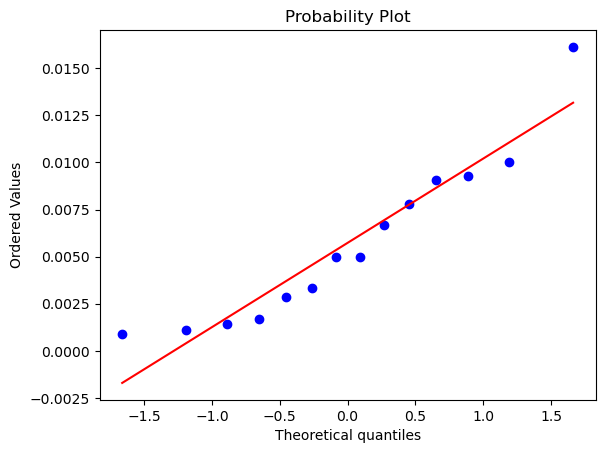

In [17]:
stats.probplot(1/(weight_grains),dist="norm",plot=pylab)

((array([-1.66151682, -1.18948235, -0.88997893, -0.65463235, -0.45108016,
         -0.2648058 , -0.08735875,  0.08735875,  0.2648058 ,  0.45108016,
          0.65463235,  0.88997893,  1.18948235,  1.66151682]),
  array([1400, 1500, 1600, 1670, 1900, 1900, 2200, 2300, 2500, 2700, 2800,
         3000, 3400, 3900], dtype=int64)),
 (786.2835439789025, 2340.714285714286, 0.9770434301718469))

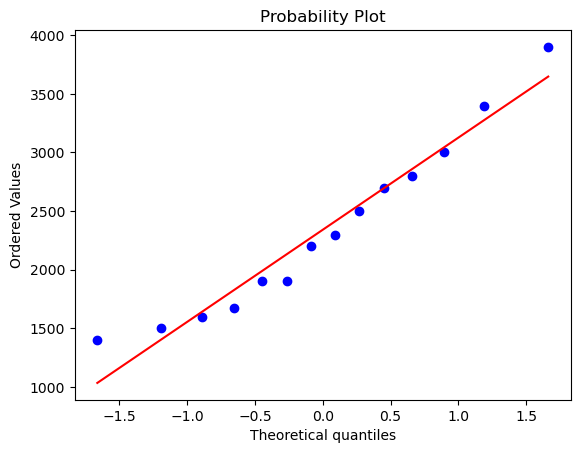

In [13]:
stats.probplot(calories_consumed,dist="norm",plot=pylab)

((array([-1.66151682, -1.18948235, -0.88997893, -0.65463235, -0.45108016,
         -0.2648058 , -0.08735875,  0.08735875,  0.2648058 ,  0.45108016,
          0.65463235,  0.88997893,  1.18948235,  1.66151682]),
  array([7.24422752, 7.31322039, 7.37775891, 7.42057891, 7.54960917,
         7.54960917, 7.69621264, 7.7406644 , 7.82404601, 7.90100705,
         7.9373747 , 8.00636757, 8.13153071, 8.26873183])),
 (0.33540542717569266, 7.711495639806377, 0.9912678803533991))

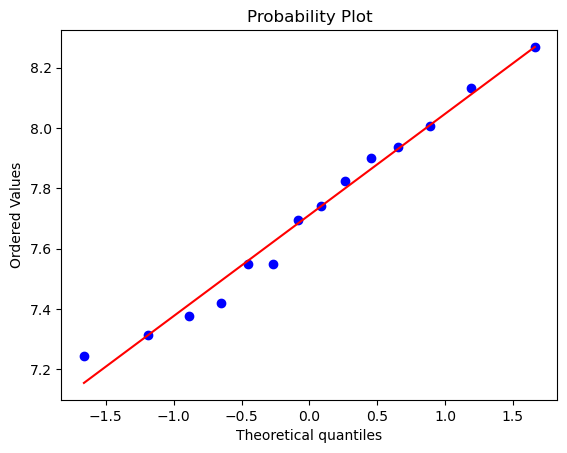

In [14]:
stats.probplot(np.log(calories_consumed),dist="norm",plot=pylab)

# outlier treatment

In [54]:
# outlier treatment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

data=pd.read_csv("boston_data.csv")

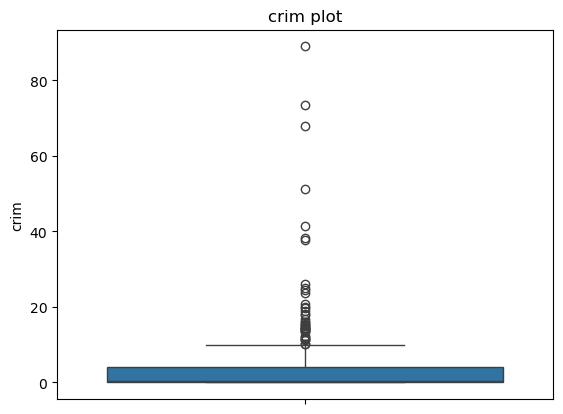

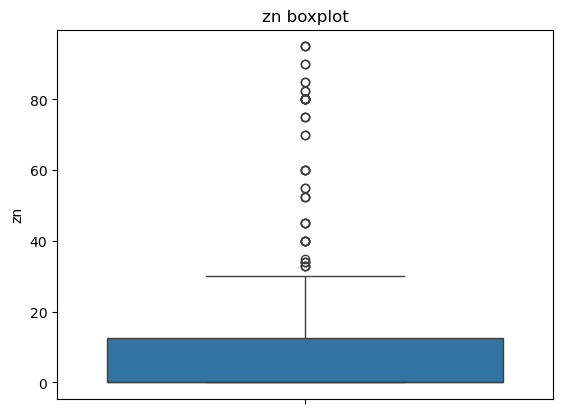

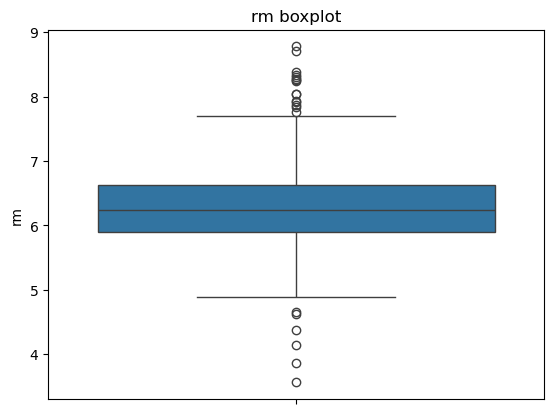

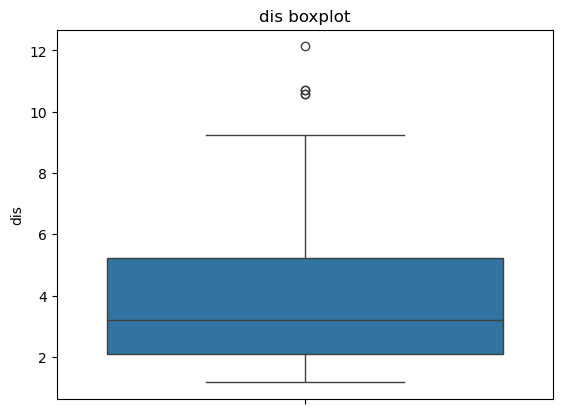

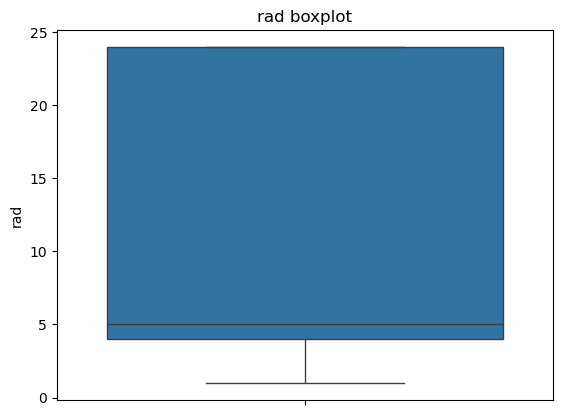

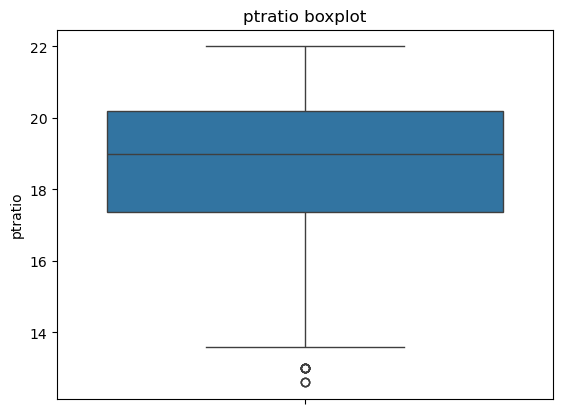

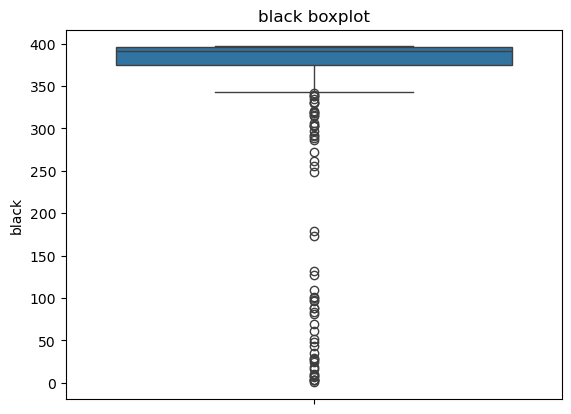

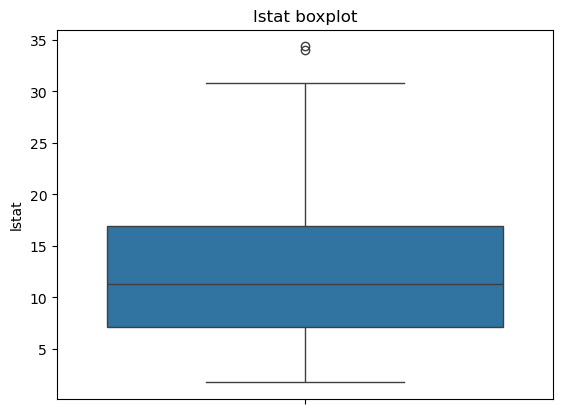

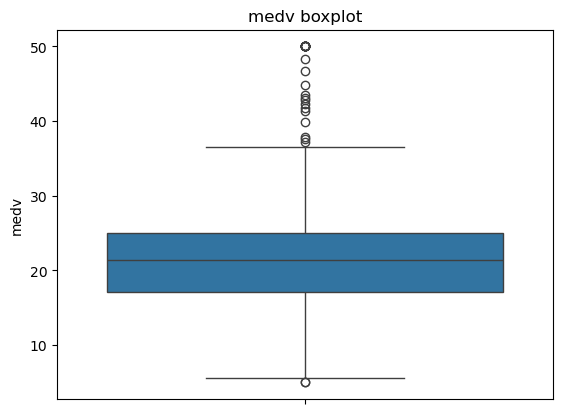

In [56]:
sns.boxplot(data.crim);plt.title("crim plot");plt.show()
sns.boxplot(data.zn);plt.title("zn boxplot");plt.show()
sns.boxplot(data.rm);plt.title("rm boxplot");plt.show()
sns.boxplot(data.dis);plt.title("dis boxplot");plt.show()
sns.boxplot(data.rad);plt.title("rad boxplot");plt.show()
sns.boxplot(data.ptratio);plt.title("ptratio boxplot");plt.show()
sns.boxplot(data.black);plt.title("black boxplot");plt.show()
sns.boxplot(data.lstat);plt.title("lstat boxplot");plt.show()
sns.boxplot(data.medv);plt.title("medv boxplot");plt.show()

In [57]:
def outlier_trim(data_trim,l_bound,u_bound,l_limit,u_limit):
    IQR=data_trim.quantile(u_bound)-data_trim.quantile(l_bound)
    lower_limit=data_trim.quantile(l_limit)-(IQR*1.5)
    upper_limit=data_trim.quantile(u_limit)+(IQR*1.5)
    outliers_data=np.where(data_trim>upper_limit,True,np.where(data_trim<lower_limit,True,False))
    data_trimmed=data.loc[~(outliers_data),]
    data.shape,data_trimmed.shape
    print(IQR,upper_limit,lower_limit)
    return data_trimmed

4.869807000000008 22.8372555 2.146013099999985


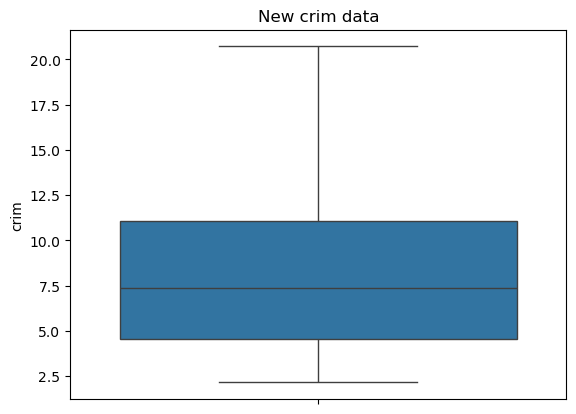

In [58]:
crim_data=outlier_trim(data['crim'], 0.15, 0.78, 0.88, 0.95)# for crim
sns.boxplot(crim_data.crim);plt.title("New crim data");plt.show()

In [59]:
def outlier_replace(data_rep,low_bound,up_bound,low_limit,up_limit):
    IQR=data_rep.quantile(up_bound)-data_rep.quantile(low_bound)
    lower_limit=data_rep.quantile(low_limit)-(IQR*1.5)
    upper_limit=data_rep.quantile(up_limit)+(IQR*1.5)
    data['data_replaced']=pd.DataFrame(np.where(data_rep>upper_limit,upper_limit,np.where(data_rep<lower_limit,lower_limit,data_rep)))
    return data['data_replaced']

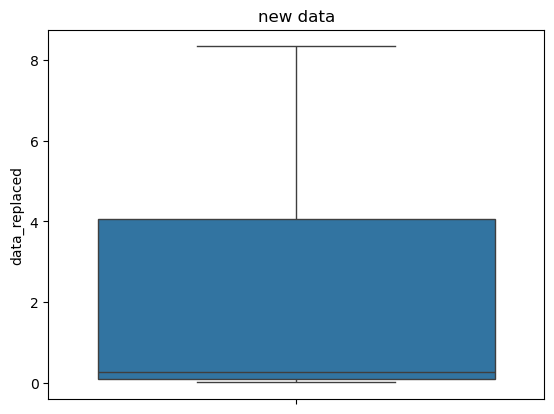

In [60]:
crim_data_rep=outlier_replace(data['crim'], 0.20, 0.78,0.45, 0.65) 
sns.boxplot(crim_data_rep);plt.title("new data");plt.show()

In [62]:
!pip install feature-engine

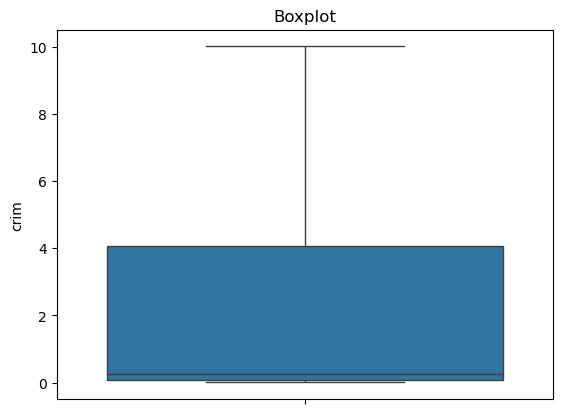

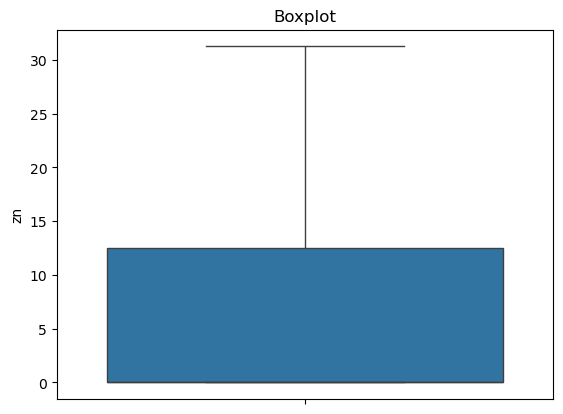

In [63]:
from feature_engine.outliers import Winsorizer
windsoriser = Winsorizer(capping_method='iqr', # choose skewed for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['crim'])

data_t=windsoriser.fit_transform(data[['crim']])

windsoriser.left_tail_caps_, windsoriser.right_tail_caps_

sns.boxplot(data_t.crim);plt.title('Boxplot');plt.show()

windsoriser = Winsorizer(capping_method='iqr', # choose skewed for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['zn'])

data_t=windsoriser.fit_transform(data[['zn']])

windsoriser.left_tail_caps_, windsoriser.right_tail_caps_

sns.boxplot(data_t.zn);plt.title('Boxplot');plt.show()

# scaling

In [64]:
import pandas as pd

data=pd.read_csv("Seeds_data.csv")
data.dtypes


Area               float64
Perimeter          float64
Compactness        float64
length             float64
Width              float64
Assymetry_coeff    float64
len_ker_grove      float64
Type                 int64
dtype: object

In [68]:
data

,Area,Perimeter,Compactness,length,Width,Assymetry_coeff,len_ker_grove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [65]:
############################### Normalisation
def normalize(i):
   dat=(i-i.min())/(i.max()-i.min()) # x-xmin/range for values range to 0 to 1
   return dat

new_data=normalize(data.iloc[:,:]) # normalising all rows and all columns


In [67]:
new_data

,Area,Perimeter,Compactness,length,Width,Assymetry_coeff,len_ker_grove,Type
0,0.440982,0.502066,0.570780,0.486486,0.486101,0.189302,0.345150,0.0
1,0.405099,0.446281,0.662432,0.368806,0.501069,0.032883,0.215165,0.0
2,0.349386,0.347107,0.879310,0.220721,0.503920,0.251453,0.150665,0.0
3,0.306893,0.316116,0.793103,0.239302,0.533856,0.194243,0.140817,0.0
4,0.524079,0.533058,0.864791,0.427365,0.664291,0.076701,0.322994,0.0
...,...,...,...,...,...,...,...,...
205,0.151086,0.163223,0.637024,0.134009,0.250178,0.372635,0.172821,1.0
206,0.060434,0.097107,0.390200,0.135698,0.117605,0.462872,0.238306,1.0
207,0.246459,0.258264,0.727768,0.189752,0.429081,0.981667,0.264402,1.0
208,0.118036,0.165289,0.399274,0.155405,0.146828,0.368344,0.258493,1.0


In [66]:

##########################standardisation####################################

def standardise(x):
    dat=(x-x.mean())/(x.std()) # x-mean/standard deviation mean=0 sigma=1
    return dat

std_data=standardise(data.iloc[:,:]) # standardise all rows and columns

In [69]:
std_data

,Area,Perimeter,Compactness,length,Width,Assymetry_coeff,len_ker_grove,Type
0,0.141759,0.214949,0.000060,0.303493,0.140336,-0.983801,-0.382663,-1.221825
1,0.011161,0.008204,0.427494,-0.168223,0.196026,-1.783904,-0.919816,-1.221825
2,-0.191609,-0.359342,1.438945,-0.761817,0.206633,-0.665888,-1.186357,-1.221825
3,-0.346264,-0.474200,1.036904,-0.687336,0.318013,-0.958528,-1.227051,-1.221825
4,0.444196,0.329807,1.371233,0.066507,0.803311,-1.559768,-0.474223,-1.221825
...,...,...,...,...,...,...,...,...
205,-0.913333,-1.040834,0.308997,-1.109397,-0.737442,-0.046025,-1.094797,1.221825
206,-1.243264,-1.285864,-0.842110,-1.102626,-1.230696,0.415547,-0.824186,1.221825
207,-0.566218,-0.688602,0.732199,-0.885953,-0.071816,3.069254,-0.716349,1.221825
208,-1.033620,-1.033176,-0.799790,-1.023631,-1.121968,-0.067973,-0.740765,1.221825
